In [2]:
vars <- c('C150_4','UGDS','AVGFACSAL','COSTT4_A','SAT_AVG','PCTPELL','ADM_RATE')
varlabels <- c('Rate of undergraduate completion',
               'Undergraduate student count',
               'Average faculty salary',
               'Average annual cost',
               'Average SAT score',
               'Percent of students receiving PELL grants',
               'Admission rate')
hw4 <- read.csv("./MERGED2013_PPv2.csv")[,vars]
str(head(hw4))
print('hello')

'data.frame':	6 obs. of  7 variables:
 $ C150_4   : num  0.291 0.538 0.667 0.483 0.252 ...
 $ UGDS     : int  4051 11200 322 5525 5354 28692
 $ AVGFACSAL: int  7079 10170 3849 9341 6557 9605
 $ COSTT4_A : int  18888 19990 12300 20306 17400 26717
 $ SAT_AVG  : int  823 1146 NA 1180 830 1171
 $ PCTPELL  : num  0.712 0.35 0.684 0.328 0.827 ...
 $ ADM_RATE : num  0.899 0.867 NA 0.806 0.512 ...
[1] "hello"


In [51]:
hw4$pctgrad = hw4$C150_4 * 100
vars <- append(vars, 'pctgrad')
varlabels <- append(varlabels, 'Percent graduating')
ycol <- length(vars)
xcols <- c(2:7)
head(hw4)

C150_4,UGDS,AVGFACSAL,COSTT4_A,SAT_AVG,PCTPELL,ADM_RATE,pctgrad
0.2914,4051,7079,18888,823,0.7115,0.8989,29.14
0.5377,11200,10170,19990,1146,0.3505,0.8673,53.77
0.6667,322,3849,12300,NA,0.6839,NA,66.67
0.4835,5525,9341,20306,1180,0.3281,0.8062,48.35
0.2517,5354,6557,17400,830,0.8265,0.5125,25.17
0.6665,28692,9605,26717,1171,0.2107,0.5655,66.65


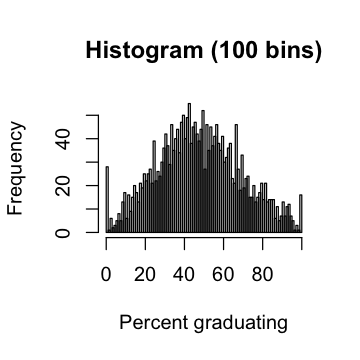

In [14]:
#str(hw4)
#hw4 <- na.omit(hw4)
#head(hw4)
options(repr.plot.width=3, repr.plot.height=3)
hist(hw4[,ycol], xlab="Percent graduating", main="Histogram (100 bins)",breaks=100)#, main='Histogram of undergratuate completion'


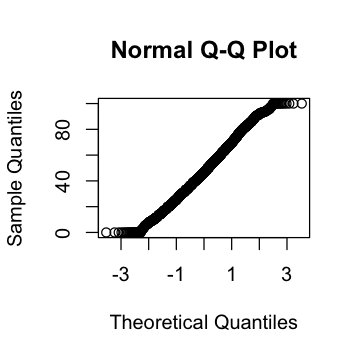

In [12]:
qqnorm(hw4[,ycol])

In [4]:
no_na <- na.omit(hw4)
corr <- cor(no_na)[1,]
#names(corr) <- varlabels
corr = round(corr,2)
corrdf <- data.frame(Variable=varlabels, Correlation_to_Pct_Graduated=corr)[2:7,]
rownames(corrdf) <- NULL
print(corrdf)

                                   Variable Correlation_to_Pct_Graduated
1               Undergraduate student count                         0.16
2                    Average faculty salary                         0.61
3                       Average annual cost                         0.59
4                         Average SAT score                         0.82
5 Percent of students receiving PELL grants                        -0.71
6                            Admission rate                        -0.29


In [46]:
stats <- data.frame(#model='z',
                        Variable=0,
                        r.sq=0,
                        cor.coef=0,
                        df=0,
                        estimate.intercept=0,
                        pval.intercept=0,
                        estimate.slope=0,
                        pval.slope=0,
                   stringsAsFactors=F)
for (i in xcols) {
    f <- glue::glue('{vars[ycol]} ~ {vars[i]}')
    model <- lm(f, data = hw4)
    smry <- summary(model)
    print(f)
    print(smry)
    stats[nrow(stats)+1,] = list(
                        #model=f,
                        Variable=varlabels[[i]],
                        r.sq=smry$adj.r.squared,
                        cor.coef=sqrt(smry$adj.r.squared),
                        df=smry$df[[2]],
                        estimate.intercept=smry$coefficients[1,1],
                        pval.intercept=smry$coefficients[1,4],
                        estimate.slope=smry$coefficients[2,1],
                        pval.slope=smry$coefficients[2,4])
}
stats <- stats[2:nrow(stats),]
rownames(stats) <- NULL
stats
# model:
# [1] "coefficients"  "residuals"     "effects"       "rank"         
# [5] "fitted.values" "assign"        "qr"            "df.residual"  
# [9] "na.action"     "xlevels"       "call"          "terms"        
# [13] "model"   
# smry:
# [1] "call"          "terms"         "residuals"     "coefficients" 
# [5] "aliased"       "sigma"         "df"            "r.squared"    
# [9] "adj.r.squared" "fstatistic"    "cov.unscaled"  "na.action"    

pctgrad ~ UGDS

Call:
lm(formula = f, data = hw4)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.083 -14.952  -0.812  14.354  53.898 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.610e+01  4.912e-01  93.841  < 2e-16 ***
UGDS        3.656e-04  5.919e-05   6.177 7.63e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.22 on 2446 degrees of freedom
  (5356 observations deleted due to missingness)
Multiple R-squared:  0.01536,	Adjusted R-squared:  0.01496 
F-statistic: 38.16 on 1 and 2446 DF,  p-value: 7.628e-10

pctgrad ~ AVGFACSAL

Call:
lm(formula = f, data = hw4)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.989 -12.232  -0.262  11.688  79.755 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.709e+01  1.068e+00   16.00   <2e-16 ***
AVGFACSAL   4.728e-03  1.563e-04   30.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

Variable,r.sq,cor.coef,df,estimate.intercept,pval.intercept,estimate.slope,pval.slope
Undergraduate student count,0.01495694,0.1222986,2446,46.09669,0.000000e+00,3.655899e-04,7.627722e-10
Average faculty salary,0.27342130,0.5228970,2428,17.09193,7.069254e-55,4.727621e-03,7.416366e-171
Average annual cost,0.28942579,0.5379831,2385,20.65941,2.741287e-98,9.190133e-04,2.036421e-179
Average SAT score,0.66209316,0.8136911,1375,-60.51631,1.817932e-129,1.087605e-01,0.000000e+00
Percent of students receiving PELL grants,0.28389091,0.5328141,2444,73.24137,0.000000e+00,-5.571999e+01,1.117018e-179
Admission rate,0.10352043,0.3217459,1794,72.89517,0.000000e+00,-3.148097e+01,9.462405e-45


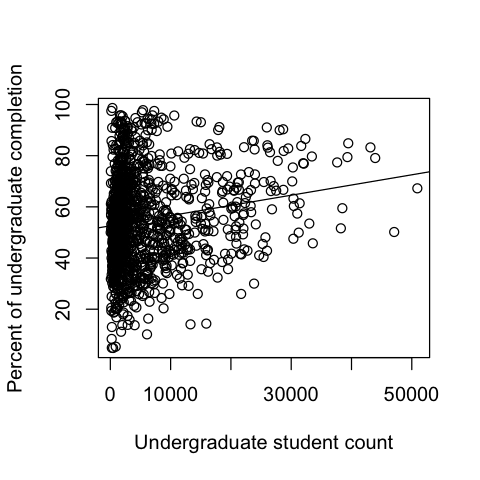

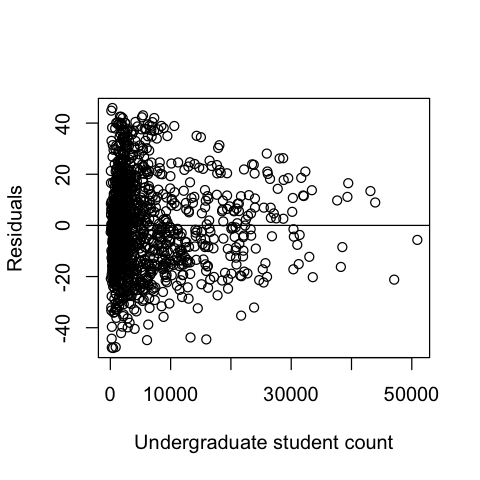

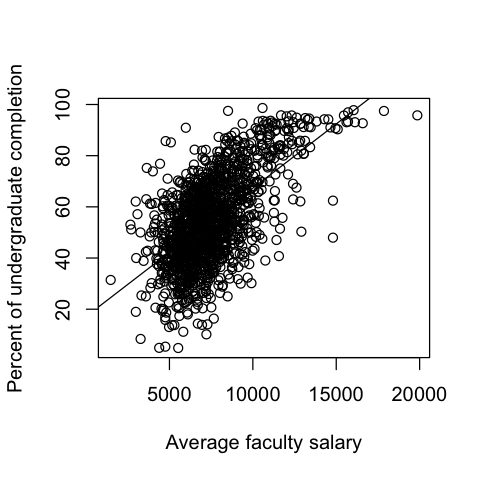

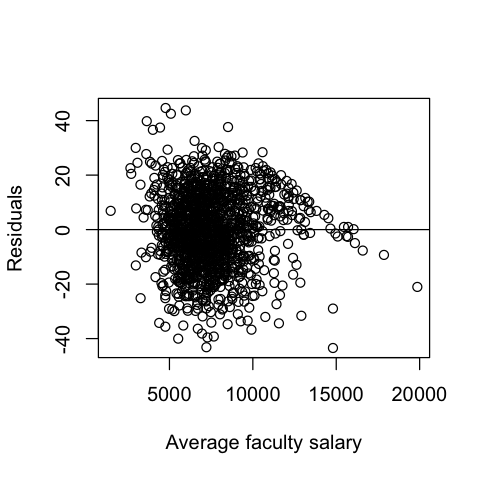

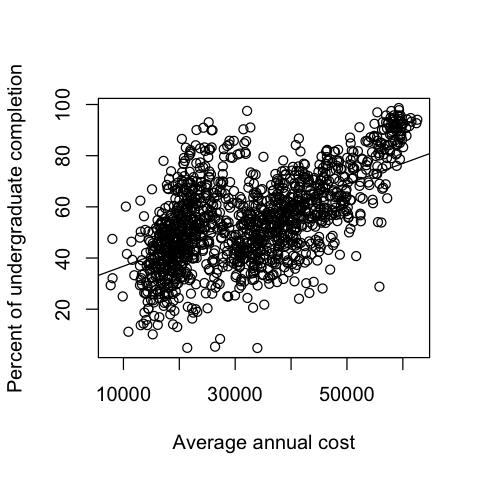

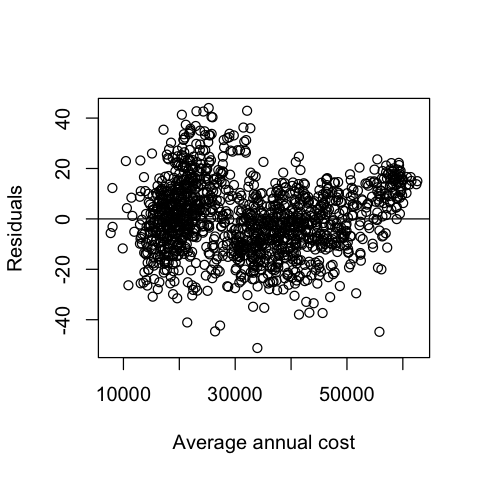

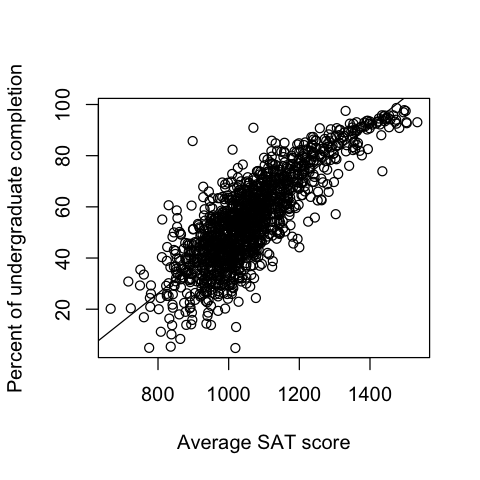

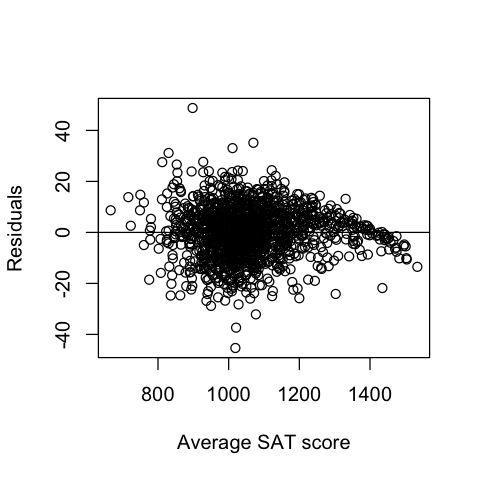

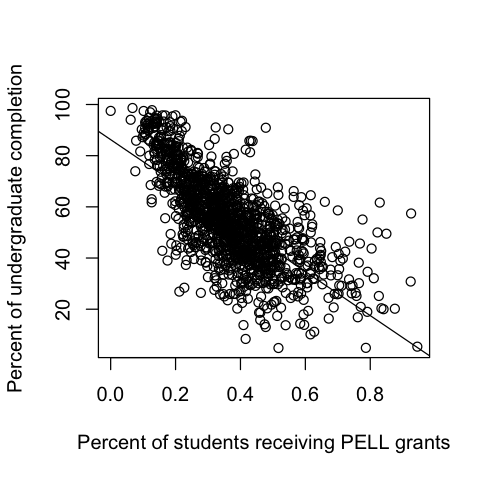

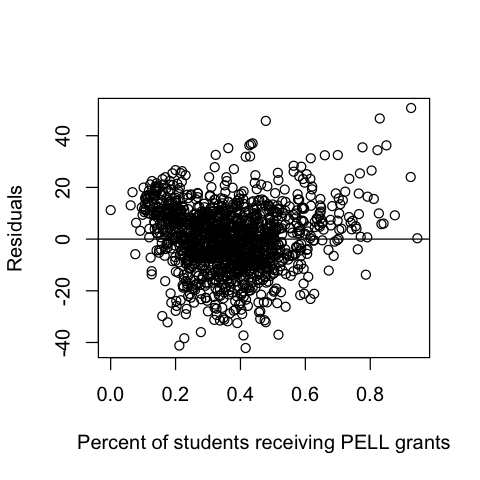

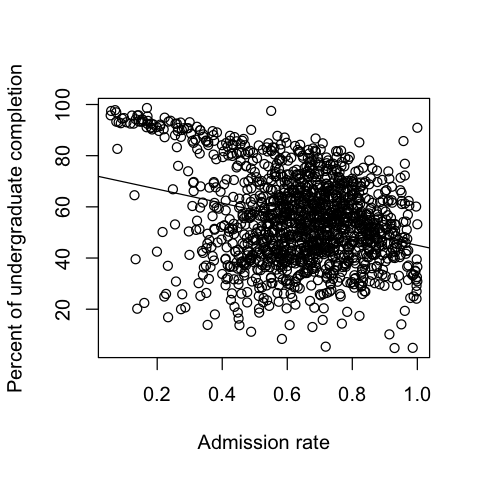

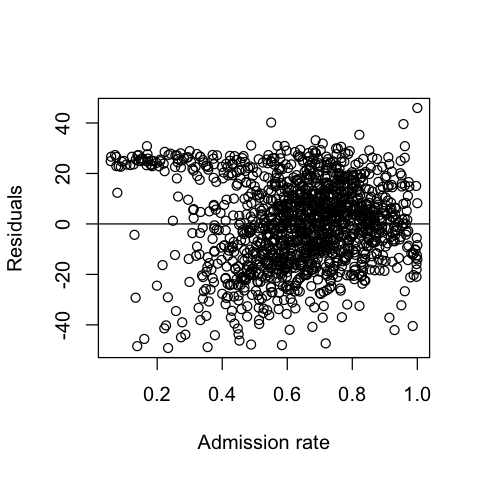

In [50]:
options(repr.plot.width=4, repr.plot.height=4)
for (i in xcols) {
    f <- glue::glue('{vars[ycol]} ~ {vars[i]}')
    model <- lm(f, data = no_na)
    smry <- summary(model)
    res = resid(model)
    plot(no_na[,ycol] ~ no_na[,i], ylab=varlabels[[ycol]], xlab=varlabels[[i]])
    abline(model)
    plot(no_na[,i], res, ylab="Residuals", xlab=varlabels[i], main=NULL) 
    abline(0, 0)
}

In [1]:
options(repr.plot.width=3, repr.plot.height=3)
hist(hw4[,5], xlab="University averages", main="Average SAT distribution")
qqnorm(hw4[,5])

ERROR: Error in hist(hw4[, 5], xlab = "University averages", main = "Average SAT distribution"): object 'hw4' not found
